<a href="https://colab.research.google.com/github/epate2000/BSAN-6070-CA-05/blob/main/Subsidy_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('finalData2.csv')

In [ ]:
print(df['hq_country'].value_counts())

USA    25537
Name: hq_country, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



<ipython-input-33-a8bf21b15d07>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()


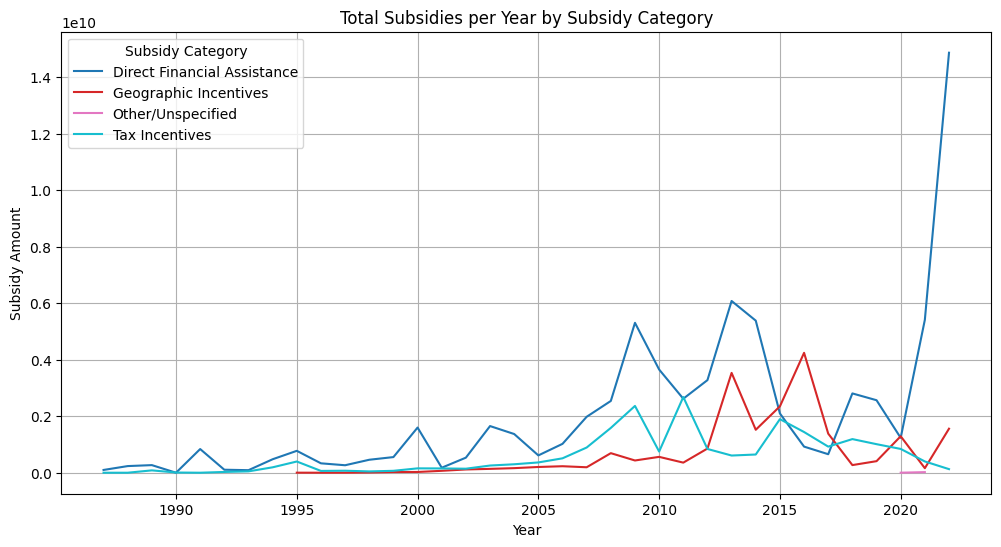

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("finalData2.csv")

# Limit to top 10 subsidies by count
top_10_subs = df['subsidy_category_general'].value_counts()

# Filter the data to only include the top 10 subsidies
df = df[df['subsidy_category_general'].isin(top_10_subs.index)]

# Group the data by year and subsidy category
grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()

# Pivot the data to have subsidy categories as columns
pivoted = grouped.pivot(index='year', columns='subsidy_category_general', values='subsidy')

# Create the plot
ax = pivoted.plot(kind='line', figsize=(12,6), cmap='tab10')

# Set the axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Subsidy Amount")
ax.set_title("Total Subsidies per Year by Subsidy Category")

# Add grid lines
ax.grid(True)

# Add a legend title
ax.legend(title='Subsidy Category')

# Show the plot
plt.show()



<ipython-input-1-d7d3a9e5c75d>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()


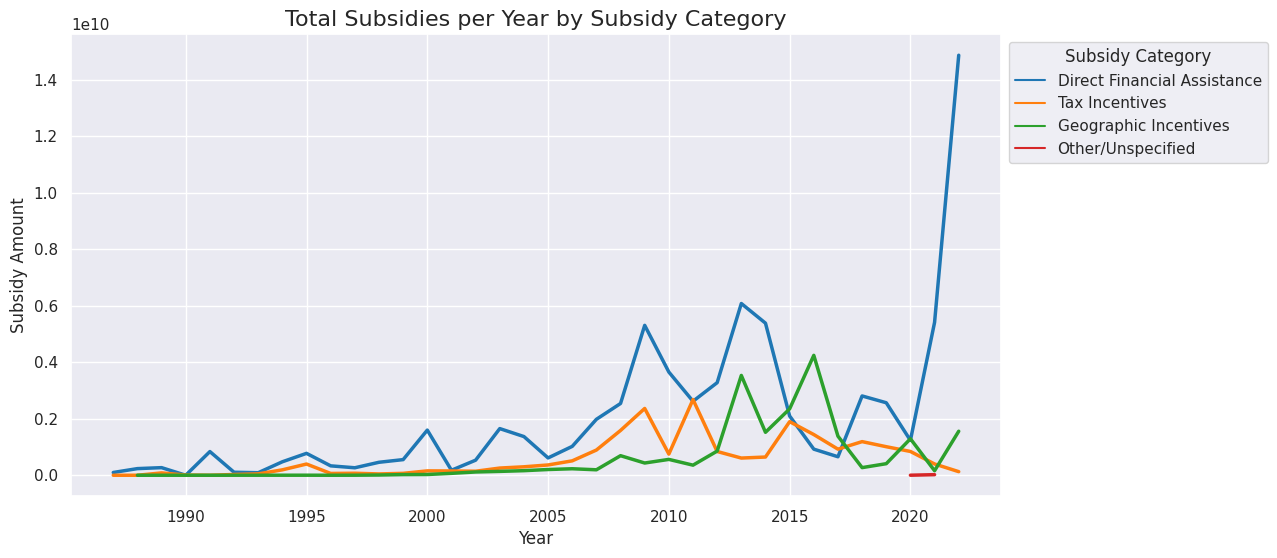

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("finalData2.csv")

# Limit to top 10 subsidies by count
top_10_subs = df['subsidy_category_general'].value_counts()

# Filter the data to only include the top 10 subsidies
df = df[df['subsidy_category_general'].isin(top_10_subs.index)]

# Group the data by year and subsidy category
grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()

# Create the plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=grouped, x="year", y="subsidy", hue="subsidy_category_general", linewidth=2.5, palette="tab10")

# Set the axis labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Subsidy Amount", fontsize=12)
ax.set_title("Total Subsidies per Year by Subsidy Category", fontsize=16)

# Add a legend title
ax.legend(title='Subsidy Category', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


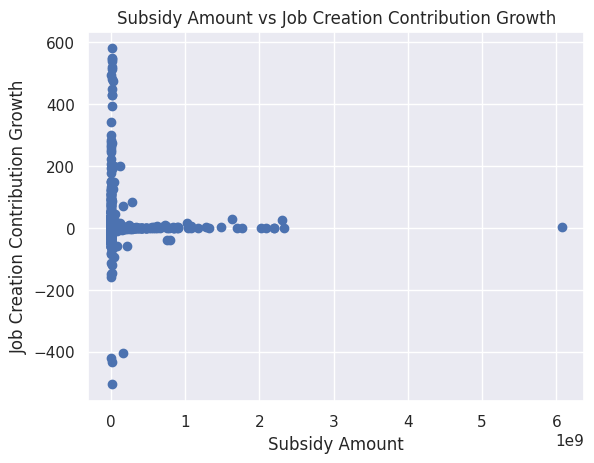

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('finalData2.csv')

plt.scatter(df['subsidy'], df['job_creation_contribution_growth'])
plt.title('Subsidy Amount vs Job Creation Contribution Growth')
plt.xlabel('Subsidy Amount')
plt.ylabel('Job Creation Contribution Growth')
plt.show()


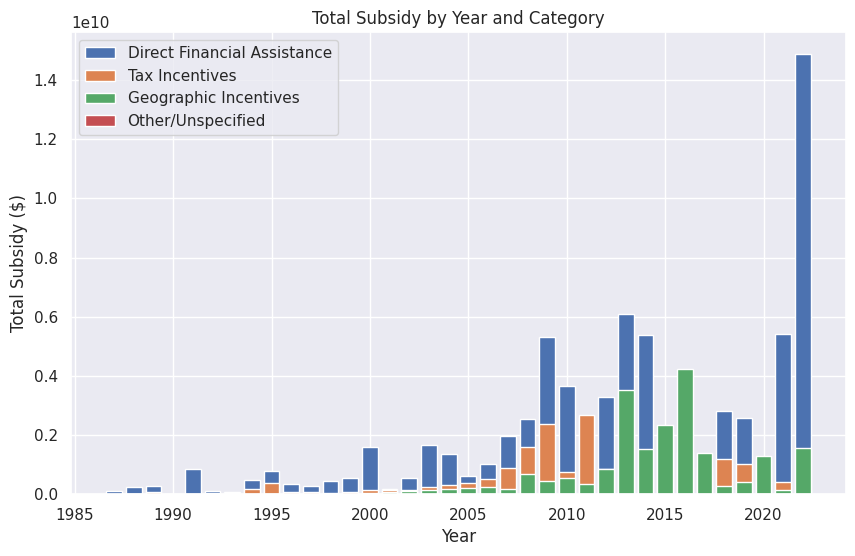

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('finalData2.csv')

# group the data by year and subsidy_category_general and calculate the total subsidy for each group
df_grouped = df.groupby(['year', 'subsidy_category_general'])['subsidy'].sum().reset_index()

# plot the data using a stacked bar chart
plt.figure(figsize=(10, 6))
for category in df_grouped['subsidy_category_general'].unique():
    plt.bar(df_grouped[df_grouped['subsidy_category_general'] == category]['year'],
            df_grouped[df_grouped['subsidy_category_general'] == category]['subsidy'],
            label=category)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Subsidy ($)')
plt.title('Total Subsidy by Year and Category')
plt.show()


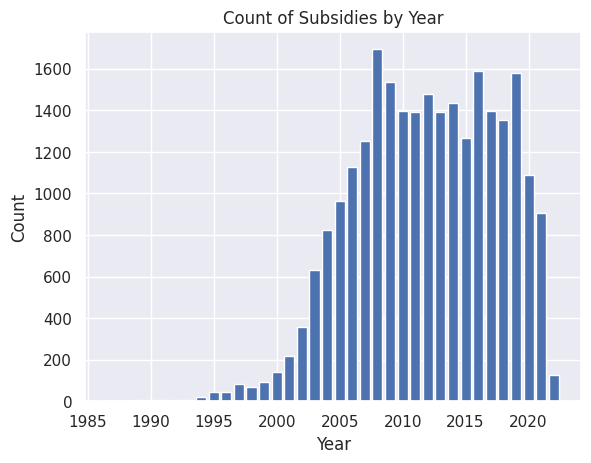

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("finalData2.csv")

# Count subsidies by year
year_counts = df.groupby("year")["subsidy"].count()

# Create bar chart
plt.bar(year_counts.index, year_counts.values)
plt.title("Count of Subsidies by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


AttributeError: ignored

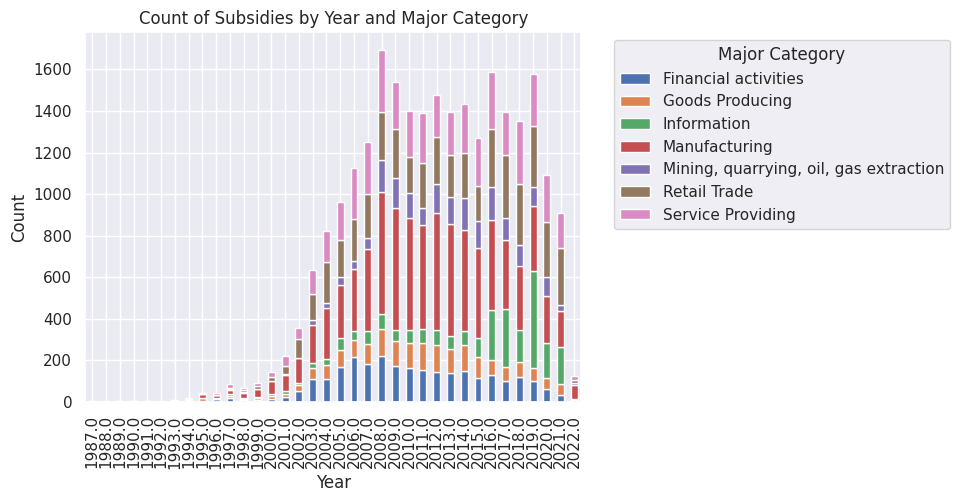

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("finalData2.csv")

# Count subsidies by year and major category
year_category_counts = df.groupby(["year", "major_category"])["subsidy"].count().unstack()


# Create stacked bar chart
year_category_counts.plot(kind="bar", stacked=True)
plt.title("Count of Subsidies by Year and Major Category")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Major Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df.index, df.Year.apply(lambda x: int(x)), rotation=45)

plt.show()


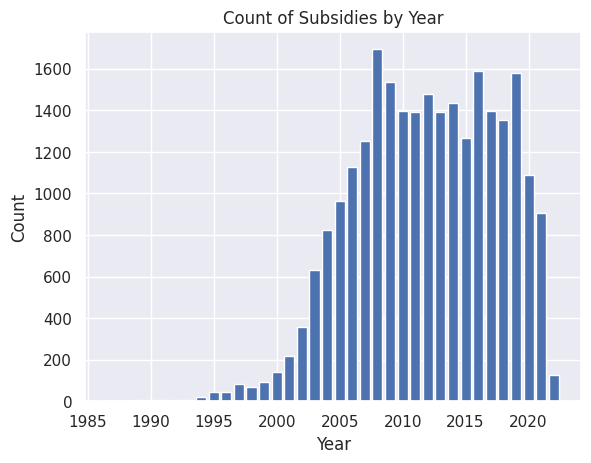

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("finalData2.csv")

# Count subsidies by year
year_counts = df.groupby("year")["subsidy"].count()

# Create bar chart
plt.bar(year_counts.index, year_counts.values)
plt.title("Count of Subsidies by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('finalData2.csv')

# Filter by industry
industry = 'Service Providing'
df_industry = df[df['industry'] == industry]

# Select relevant columns and drop rows with missing values
df_model = df_industry[['subsidy_level', 'rank', 'year', 'num_jobs']].dropna()

# Split into features and target variable
X = df_model[['subsidy_level', 'rank', 'year']]
y = df_model['num_jobs']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for new data
y_pred = model.predict(X)

# Plot actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel('Actual Number of Jobs Created')
plt.ylabel('Predicted Number of Jobs Created')
plt.title('Linear Regression Model for {} Industry'.format(industry))
plt.show()

# Plot coefficients for each feature
sns.barplot(x=X.columns, y=model.coef_)
plt.title('Linear Regression Coefficients for {} Industry'.format(industry))
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("finalData2.csv")

# Filter by specific industry
industry = "Service Providing"
df = df[df["industry"] == industry]

# Define the features and target variable
features = ["subsidy_level", "percent_change", "job_creation_contribution_growth", "job_creation_contribution_total"]
target = "num_jobs"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted {industry} Job Creation")
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('finalData2.csv')

# Select a specific industry
industry = 'Service Providing'
df_industry = df[df['industry'] == industry]

# Remove the state column
df_industry = df_industry.drop(['state'], axis=1)

# Split the data into training and testing sets
X = df_industry.drop(['job_creation_contribution_total'], axis=1)
y = df_industry['job_creation_contribution_total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Visualize the actual vs. predicted job creation contribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title('Actual vs. Predicted Job Creation Contribution')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("subsidy_data.csv")

# Filter the data for a specific industry
industry_df = df[df["industry"] == "Trucking and courier services"]

# Create a heatmap of job creation contribution total vs. year and subsidy type
plt.figure(figsize=(12,8))
sns.heatmap(pd.pivot_table(industry_df, values='job_creation_contribution_total', index=['year'], columns=['subsidy_type']), cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Job Creation Contribution Total vs. Year and Subsidy Type for Trucking and Courier Services Industry")
plt.show()


FileNotFoundError: ignored

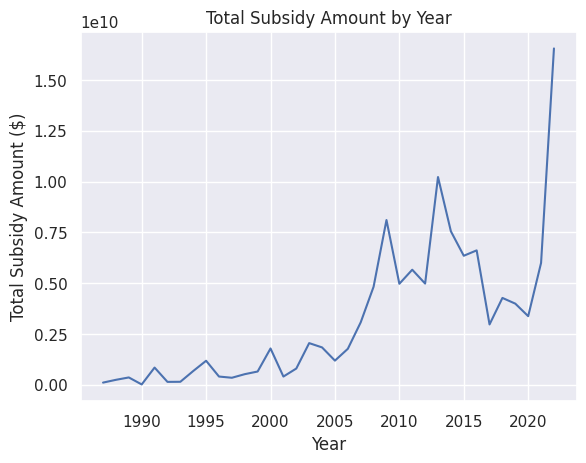

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("finalData2.csv")

# Sum subsidies by year
year_sums = df.groupby("year")["subsidy"].sum()

# Create line chart
plt.plot(year_sums.index, year_sums.values)
plt.title("Total Subsidy Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Subsidy Amount ($)")
plt.show()


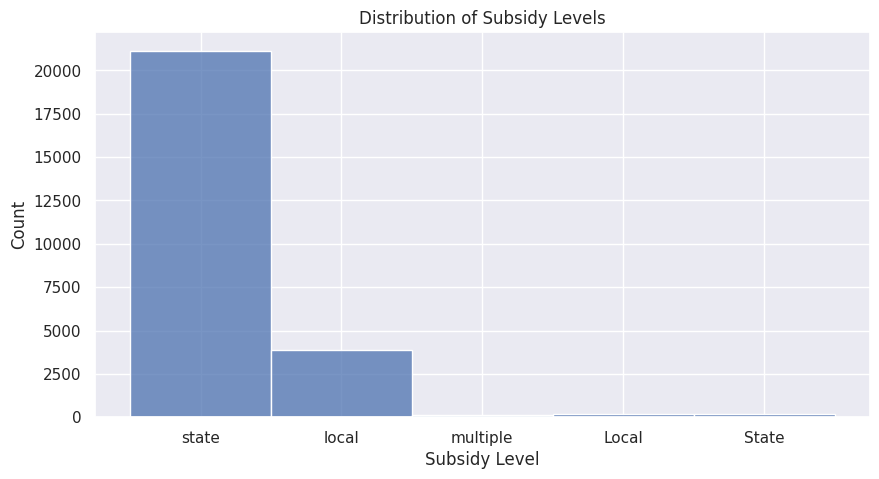

In [ ]:
# Histogram of subsidy levels
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='subsidy_level', bins=20)
plt.title('Distribution of Subsidy Levels')
plt.xlabel('Subsidy Level')
plt.ylabel('Count')
plt.show()

<ipython-input-14-41b9f1e65a6b>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()


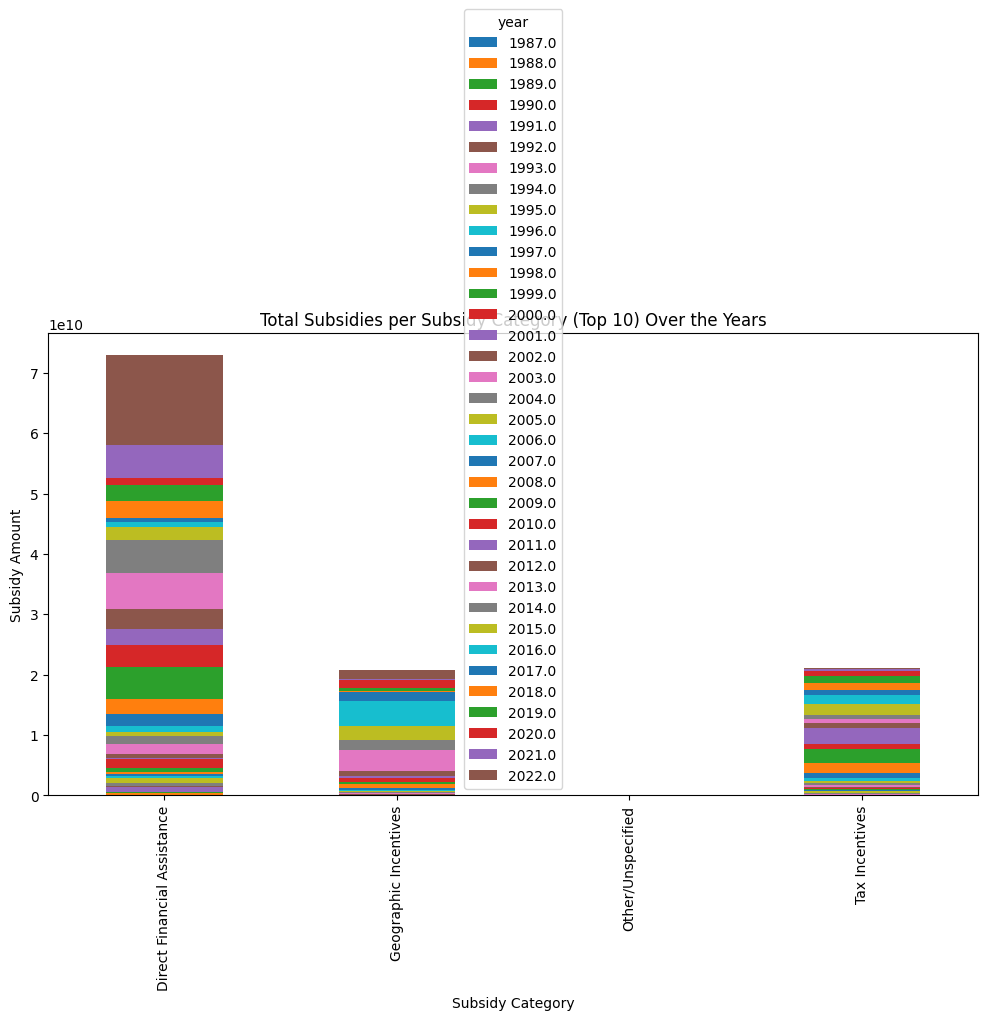

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("finalData2.csv")

# Limit to top 10 subsidies by count
top_10_subs = df['subsidy_category_general'].value_counts().head(10)

# Filter the data to only include the top 10 subsidies
df = df[df['subsidy_category_general'].isin(top_10_subs.index)]

# Group the data by year and subsidy category
grouped = df.groupby(['year', 'subsidy_category_general'], as_index=False).sum()

# Pivot the data to have years as columns
pivoted = grouped.pivot(index='subsidy_category_general', columns='year', values='subsidy')

# Create the plot
ax = pivoted.plot(kind='bar', stacked=True, figsize=(12,6))

# Set the axis labels and title
ax.set_xlabel("Subsidy Category")
ax.set_ylabel("Subsidy Amount")
ax.set_title("Total Subsidies per Subsidy Category (Top 10) Over the Years")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv('finalData2.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Check that the required columns exist in the DataFrame
if not all(col in df.columns for col in ['sub_total', 'face_total', 'num_jobs']):
    print("One or more required columns are missing from the dataset.")
    exit()

# Select the variables that we want to use to predict job creation
X = df[['sub_total', 'face_total']]
y = df['num_jobs']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict the number of jobs created based on a new subsidy amount and face amount
new_subsidy = 500000
new_face = 100000
predicted_jobs = model.predict([[new_subsidy, new_face]])
print(f"Predicted number of jobs created: {predicted_jobs[0]}")






One or more required columns are missing from the dataset.


KeyError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv('/path/to/finalData2.csv')
import os
print(os.getcwd()) # print current working directory
print(os.listdir()) # print list of files in the current directory


# Data exploration and visualization code here

# Load the CSV file
df = pd.read_csv('/path/to/finalData2.csv')

# Convert 'sub_total' column to numeric type
df['sub_total'] = pd.to_numeric(df['sub_total'], errors='coerce')

# Create a line plot of total subsidy amounts over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='year', y='sub_total')
plt.title("Total Subsidy Amounts Over the Years")
plt.xlabel("Year")
plt.ylabel("Subsidy Amount ($)")
plt.show()

# Create a heatmap of subsidy amounts by year and industry
pivoted = df.pivot_table(index='year', columns='industry', values='sub_total', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivoted, cmap='Blues')
plt.title("Subsidy Amounts by Year and Industry")
plt.xlabel("Industry")
plt.ylabel("Year")
plt.show()


FileNotFoundError: ignored

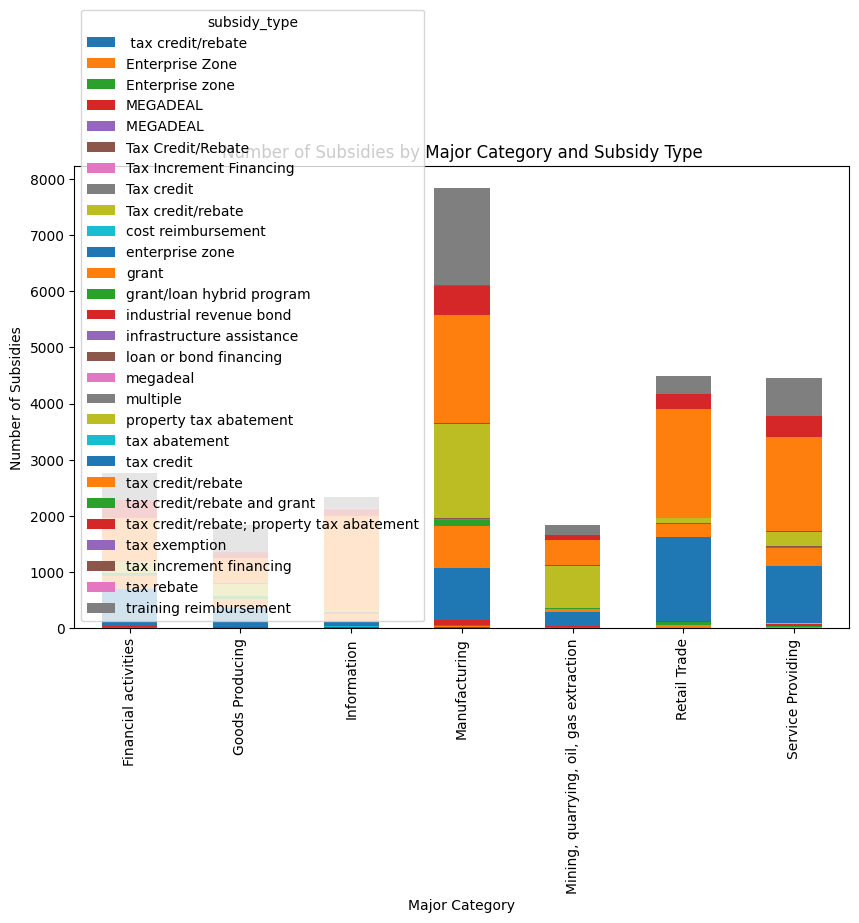

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
subsidy_data = pd.read_csv("finalData2.csv")

# Group by major category and subsidy type and count number of subsidies
subsidy_counts = subsidy_data.groupby(["major_category", "subsidy_type"])["subsidy"].count().unstack()

# Create stacked bar chart
subsidy_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Number of Subsidies by Major Category and Subsidy Type")
plt.xlabel("Major Category")
plt.ylabel("Number of Subsidies")
plt.show()


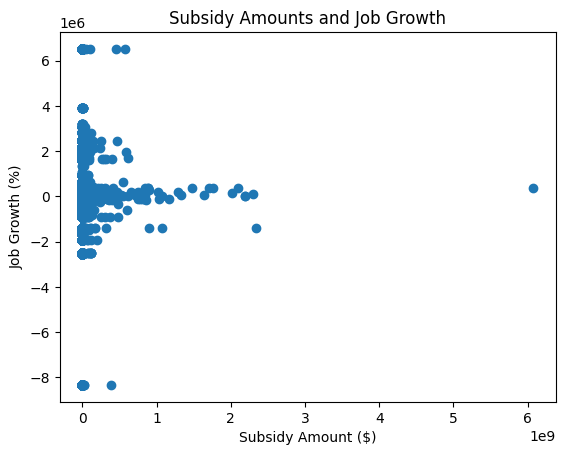

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
subsidy_data = pd.read_csv("finalData2.csv")

# Create scatter plot of subsidy amounts and job growth
plt.scatter(subsidy_data["subsidy"], subsidy_data["job_growth"])
plt.title("Subsidy Amounts and Job Growth")
plt.xlabel("Subsidy Amount ($)")
plt.ylabel("Job Growth (%)")
plt.show()


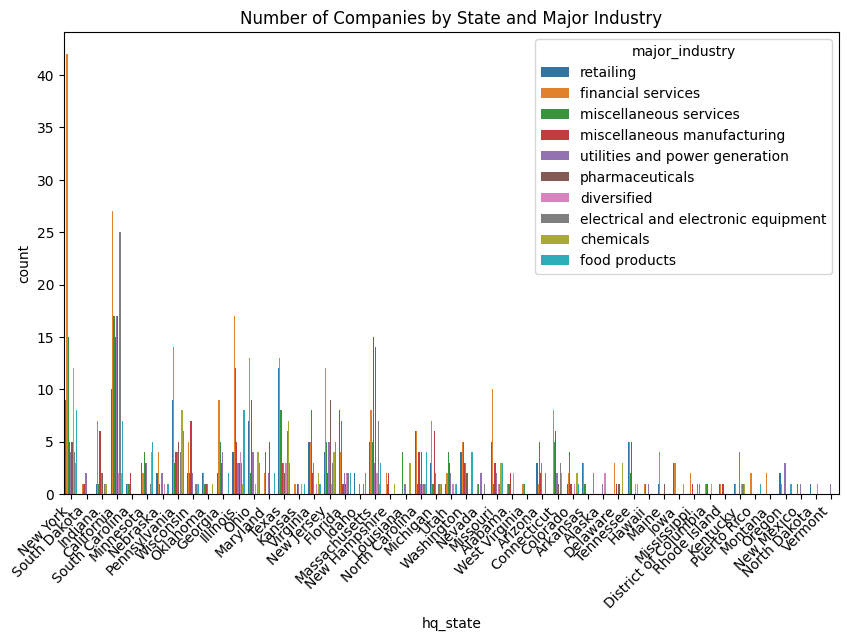

In [ ]:
industry_counts = df['major_industry'].value_counts()
top_industries = industry_counts[:10].index.tolist()

top_industry_df = df[df['major_industry'].isin(top_industries)]

plt.figure(figsize=(10, 6))
sns.countplot(x='hq_state', data=top_industry_df, hue='major_industry')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Companies by State and Major Industry')
plt.show()


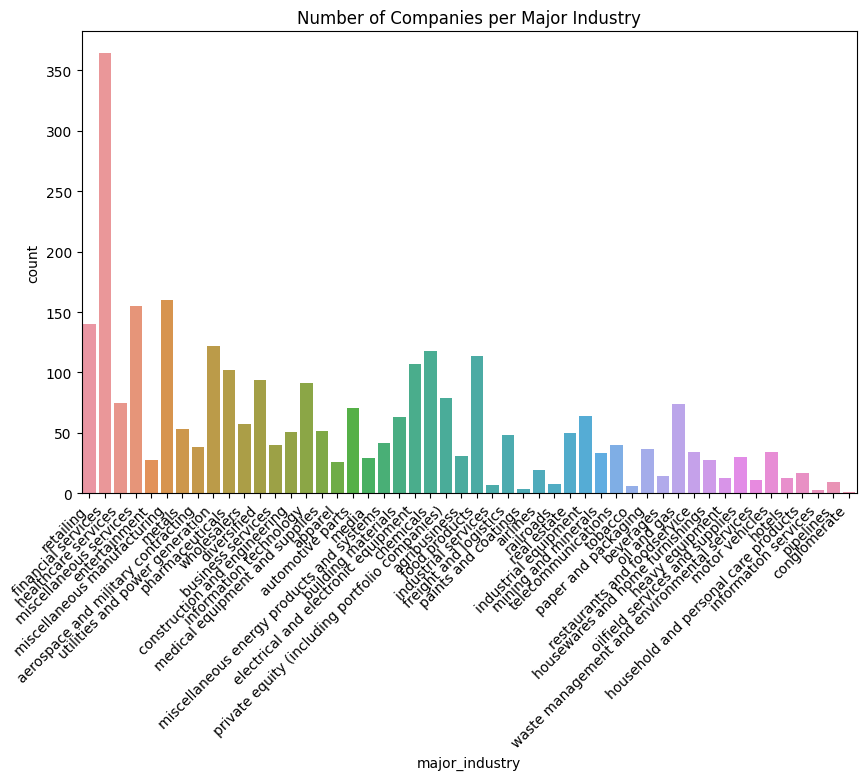

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='major_industry', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Companies per Major Industry')
plt.show()


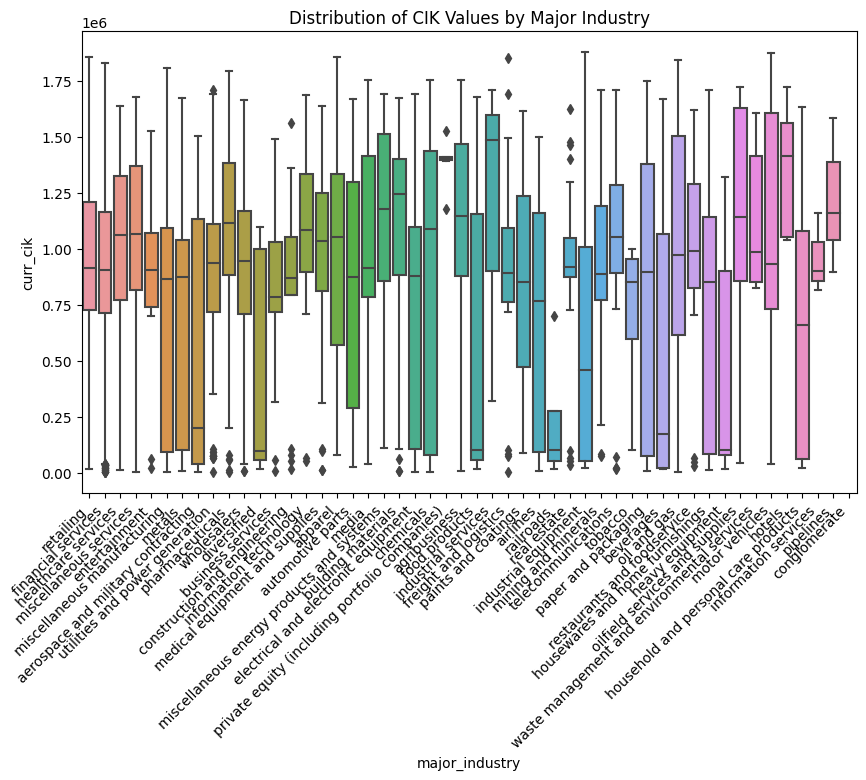

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='major_industry', y='curr_cik', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of CIK Values by Major Industry')
plt.show()


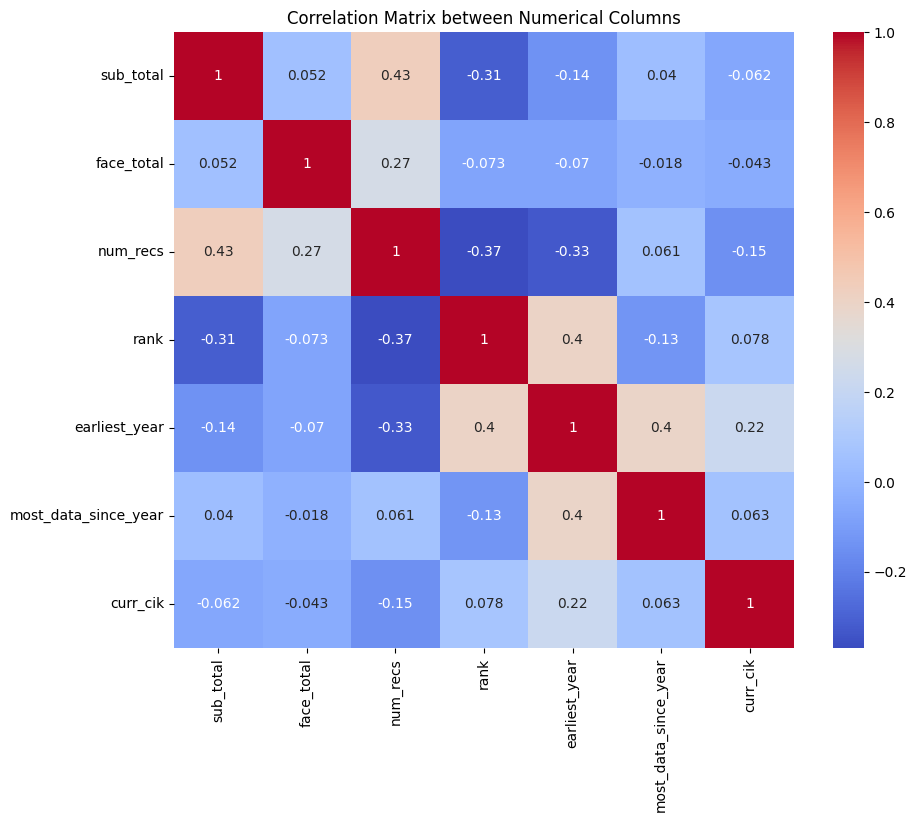

In [ ]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix between Numerical Columns')
plt.show()


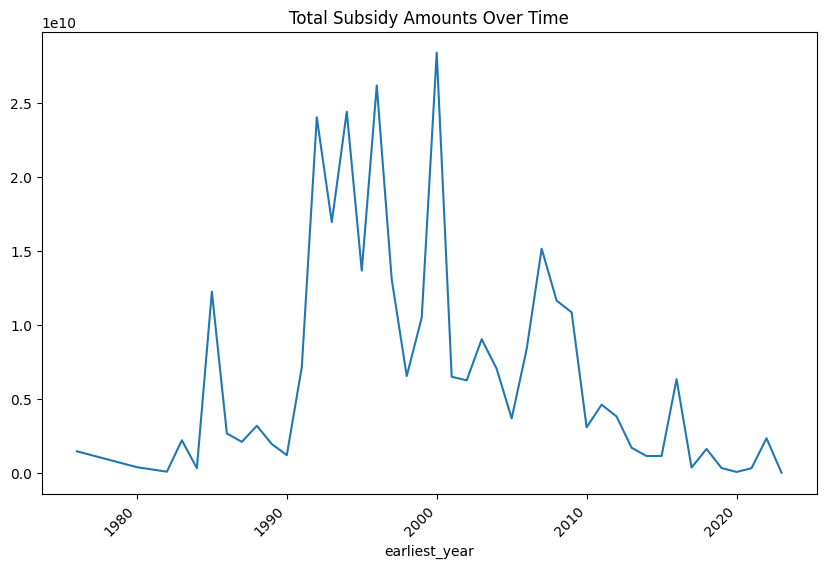

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('earliest_year')['sub_total'].sum().plot(kind='line')
plt.xticks(rotation=45, ha='right')
plt.title('Total Subsidy Amounts Over Time')
plt.show()


<ipython-input-29-b439ec1080ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  industry_totals = df.groupby(['industry', 'parent_group']).sum().reset_index()


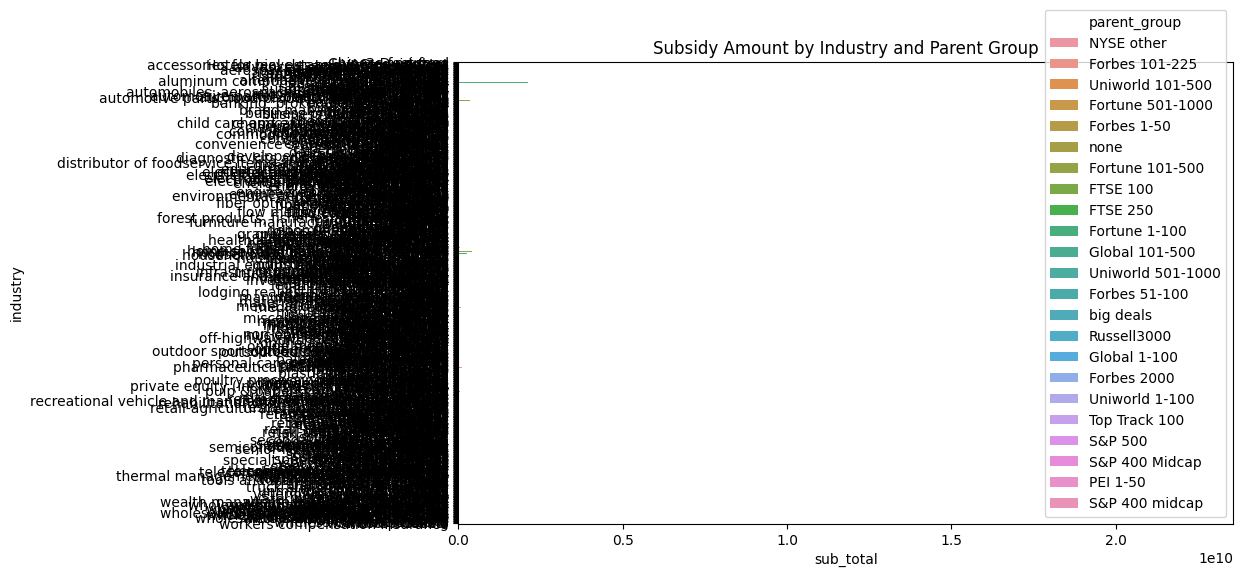

In [ ]:
industry_totals = df.groupby(['industry', 'parent_group']).sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='sub_total', y='industry', hue='parent_group', data=industry_totals, orient='h')
plt.title('Subsidy Amount by Industry and Parent Group')
plt.show()
